<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
# Import the data
boston_df=pd.read_csv(boston_url, index_col=0)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset


In [10]:
# Read the first five rows of data
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
# Info about the dataframe
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [15]:
print(f'Dataset consists of {boston_df.shape[0]} rows and {boston_df.shape[1]} columns')

Dataset consists of 506 rows and 13 columns


# Task 2: Generate Descriptive Statistics and Visualizations

In [16]:
# Descriptive statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 2.1. For the "Median value of owner-occupied homes" provide a boxplot

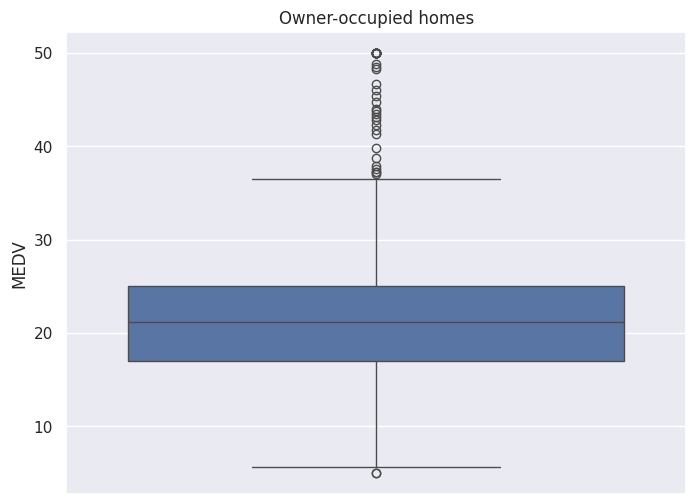

In [27]:
sns.set_theme(rc={'figure.figsize':(8, 6)})
sns.boxplot(y = 'MEDV', data = boston_df).set_title('Owner-occupied homes');

### 2.2. Provide a  bar plot for the Charles river variable

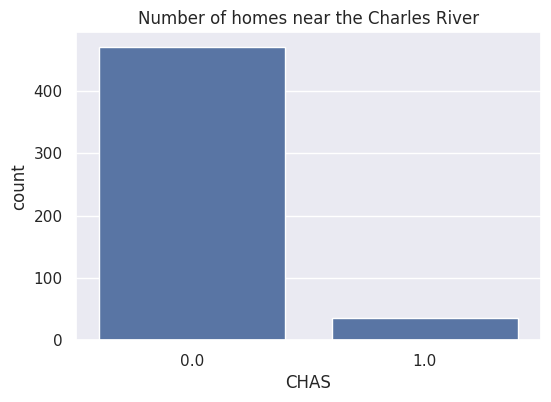

In [91]:
sns.set_theme(rc = {'figure.figsize':(6, 4)})
sns.countplot(x = 'CHAS', data = boston_df).set_title('Number of homes near the Charles River');

### 2.3.Provide a boxplot for the MEDV variable vs the AGE variable
*(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)*

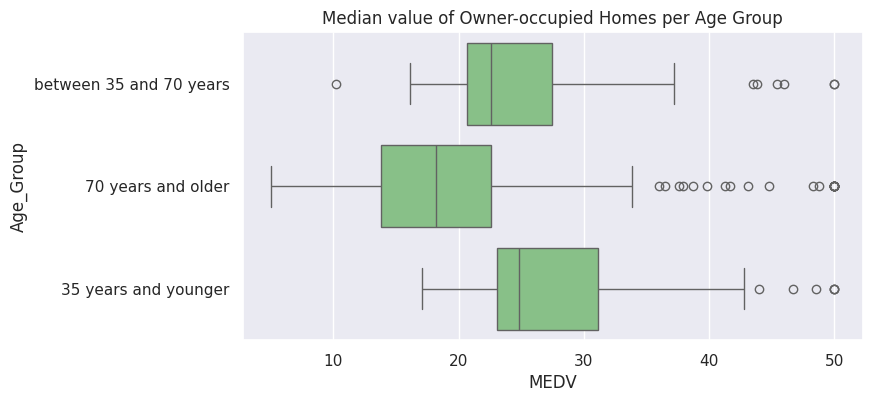

In [73]:
groups = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

for group in groups:
    group = boston_df.loc[(boston_df['AGE'] <= 35*(groups.count(group)+1)), 'AGE_Group']

sns.set_theme(rc={'figure.figsize':(8, 4)}, palette='Accent')
sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df).set_title('Median value of Owner-occupied Homes per Age Group');

### 2.4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
*What can you say about the relationship?*

Text(0.5, 1.0, 'Nitric Oxide Concentration / Proportion of Non-retail business acres per town')

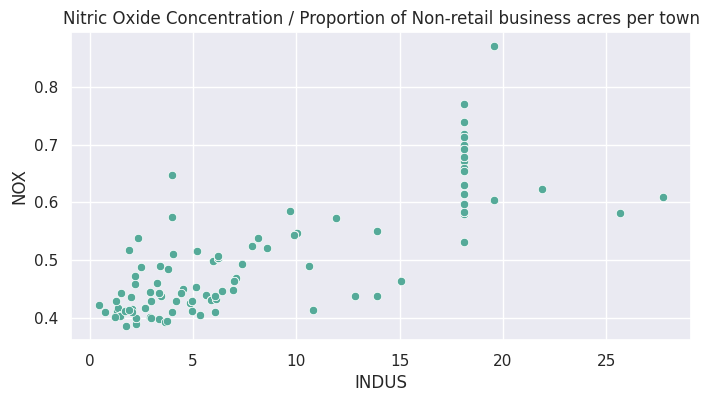

In [79]:
sns.set_theme(rc = {'figure.figsize': (8, 4)}, palette = 'dark:#5A9_r')
sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df).set_title('Nitric Oxide Concentration / Proportion of Non-retail business acres per town')

### 2.5. Create a histogram for the pupil to teacher ratio variable

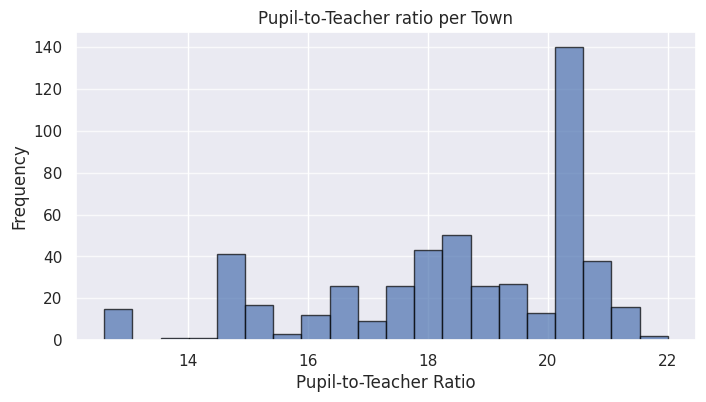

In [70]:
pyplot.hist(boston_df.PTRATIO, bins = 20, edgecolor='black', alpha=0.7)
pyplot.title('Pupil-to-Teacher ratio per Town')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(axis='y', alpha=0.75);

# Task 3: Use the appropriate tests to answer the questions provided

### 3.1. Is there a significant difference in median value of houses bounded by the Charles river or not? 
*(T-test for independent samples)*

**Hypotheses:**

$H_0$ : There's no significant difference in median value between houses bounded and not bounded by the Charles River;

$H_A$ : There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [96]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,AGE_Group,CHAS_T
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,Between 35 and 70 years,FAR
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,70 years and older,FAR
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,Between 35 and 70 years,FAR
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,Between 35 and 70 years,FAR
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,Between 35 and 70 years,FAR


In [120]:
# T - Test
ttest = scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], \
                              boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)
print(f'T-test: {ttest.statistic:.4f}, P-value: {ttest.pvalue:.4f}, DF: {ttest.df:.2f}')

T-test: -3.9964, P-value: 0.0001, DF: 504.00


Given that P-value is less than 0.05, we reject the Null Hypothesis ($H_0$). And there is no statistical difference in median value between houses bounded and not bounded by the Charles River.

### 3.2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
*(ANOVA)*

**Hypotheses:**

$H_0$ : There is no statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940;

$H_A$ : There's a statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

In [123]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Given that P-value is less than 0.05, we fail to accept the Null Hypothesis ($H_0$). There is a statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

### 3.3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
*(Pearson Correlation)*

**Hypotheses:**

$H_0$ : Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town;

$H_A$ : Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town.

In [132]:
pearscor = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson Correlation: {pearscor.statistic:.4f}, P-value: {ttest.pvalue:.4f}')

Pearson Correlation: 0.7637, P-value: 0.0001


Given the Pearson Coefficient is **0.7637** and P-value is **less** than 0.05, we reject the Null Hypothesis. Thus, there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town.

### 3.4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
*(Regression analysis)*

In [137]:
# Regression Analysis
X = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(X)

lm = sm.OLS(y, X).fit()
prediction = lm.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        15:49:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of DIS coefficient is **1.0916**. The result indicates that an additional weighted distance to the 5 employment centers in Boston increases the median value of owner occupied homes by 1.0916.